In [117]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100) # set column show as 100

# Assign goggle sheet url

sheet_id = "1uiQfhlb0isYp2JefSVzIJOngN0viwsP0PzcMab-dUw8"
sheet_name = "indian_liver_patient"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
 
# Read data set
df = pd.read_csv(url)

# Drop duplicates and null value in the data 
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Change column names in to lower case
df.columns = [i.lower() for i in df.columns]

# Change catrgorical column values into to lower case
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].apply(lambda x: x.lower())
 
 # Reset the index
df.reset_index(drop=True,inplace=True)
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 🧾 Liver Function Test (LFT) – Ranges & Interpretation

| **Test**                                   | **Normal Range** | **Mild Elevation**          | **Moderate Elevation**     | **Severe Elevation**        | **Extreme Severe**                                        |
| ------------------------------------------ | ---------------- | --------------------------- | -------------------------- | --------------------------- | --------------------------------------------------------- |
| **Total Bilirubin**                        | 0.3 – 1.2 mg/dL  | 1.3 – 3.0 mg/dL             | 3.1 – 10 mg/dL             | 10 – 20 mg/dL               | >20 mg/dL (risk of severe jaundice, liver failure)        |
| **Direct Bilirubin**                       | 0.0 – 0.3 mg/dL  | 0.4 – 1.0 mg/dL             | 1.1 – 5.0 mg/dL            | 5.1 – 10 mg/dL              | >10 mg/dL (severe obstruction/liver failure)              |
| **ALP (Alkaline Phosphatase)**             | 44 – 147 U/L     | 148 – 250 U/L               | 251 – 1000 U/L             | 1001 – 2000 U/L             | >2000 U/L (advanced liver/bone disease)                   |
| **ALT (Alanine Aminotransferase, SGPT)**   | 7 – 56 U/L       | 57 – 150 U/L                | 151 – 500 U/L              | 501 – 2000 U/L              | >2000 U/L (acute viral/toxic/ischemic hepatitis)          |
| **AST (Aspartate Aminotransferase, SGOT)** | 8 – 45 U/L       | 46 – 120 U/L                | 121 – 400 U/L              | 401 – 2000 U/L              | >2000 U/L (acute hepatitis, shock liver, toxins)          |
| **Total Protein**                          | 6.0 – 8.3 g/dL   | 5.0 – 5.9 or 8.4 – 9.0 g/dL | 4.0 – 4.9 or 9.1 – 11 g/dL | 3.0 – 3.9 or 11.1 – 12 g/dL | <3.0 or >12 g/dL (life-threatening malnutrition, myeloma) |
| **Albumin**                                | 3.5 – 5.0 g/dL   | 3.0 – 3.4 g/dL              | 2.0 – 2.9 g/dL             | 1.5 – 1.9 g/dL              | <1.5 g/dL (severe edema, ascites, critical illness)       |
| **Globulin**                               | 2.0 – 3.5 g/dL   | 3.6 – 4.5 g/dL              | 4.6 – 6.0 g/dL             | 6.1 – 8.0 g/dL              | >8.0 g/dL (multiple myeloma, advanced autoimmune disease) |
| **A/G Ratio**                              | 1.0 – 2.0        | 0.8 – 0.9 or >2.1           | 0.6 – 0.7 or >2.3          | 0.4 – 0.5 or >2.5           | <0.4 (severe liver/kidney disease, myeloma)               |


In [118]:
df[df['total_bilirubin'] > 2]['dataset'].value_counts()

dataset
1    157
2     11
Name: count, dtype: int64

In [119]:
df[df['direct_bilirubin'] > 1]['dataset'].value_counts()

dataset
1    153
2      8
Name: count, dtype: int64

In [120]:
df[df['alkaline_phosphotase'] > 150]['dataset'].value_counts()

dataset
1    368
2    140
Name: count, dtype: int64

In [121]:
df[df['alamine_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    159
2     22
Name: count, dtype: int64

In [122]:
df[df['aspartate_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    205
2     33
Name: count, dtype: int64

In [123]:
df[df['total_protiens'] > 4.5]['dataset'].value_counts() 

dataset
1    384
2    156
Name: count, dtype: int64

In [124]:
df[df['albumin'] < 3]['dataset'].value_counts() 

dataset
1    175
2     47
Name: count, dtype: int64

In [125]:
df[df['albumin_and_globulin_ratio'] < 1]['dataset'].value_counts() 

dataset
1    224
2     64
Name: count, dtype: int64

In [126]:
df['AST/ALT_ratio'] = df['aspartate_aminotransferase'] / df['alamine_aminotransferase']

### 📝 Description of AST/ALT_ratio

The AST/ALT ratio is the value obtained by dividing Aspartate Aminotransferase (AST/SGOT) by Alanine Aminotransferase (ALT/SGPT). Both AST and ALT are enzymes released into the blood when liver cells are damaged, but their relative levels can provide deeper insights into the underlying type of liver injury.

### ✅ Why I am Doing This (My Point of View)

I already have both AST and ALT values in my dataset, but looking at them individually does not always give a clear clinical picture.

By calculating the AST/ALT ratio, I can capture a combined pattern of enzyme activity rather than just raw numbers.

This ratio is a well-established clinical marker:

AST/ALT < 1 → often associated with non-alcoholic fatty liver disease (NAFLD) or viral hepatitis.

AST/ALT ≈ 1 → suggests chronic hepatitis.

AST/ALT > 2 → strongly indicates alcoholic liver disease.

AST/ALT > 3 → can suggest advanced fibrosis or cirrhosis.

So, creating this new feature helps me simplify interpretation and also provides a more meaningful feature for analysis, machine learning models, or clinical decision support.

From a data science perspective, it is also a form of feature engineering: instead of treating AST and ALT as two separate variables, I am deriving a clinically useful ratio that carries stronger diagnostic value.

In [127]:
# Cheking normal ranges in data set
not_cld_df = df[(df['total_bilirubin'] >=0.3) &
               (df['total_bilirubin'] <=1.2) &

               (df['direct_bilirubin'] <=0.3) & 

               (df['alkaline_phosphotase'] >=44) &
               (df['alkaline_phosphotase'] <=147) &

               (df['alamine_aminotransferase'] >=7) &
               (df['alamine_aminotransferase'] <=56) &

               (df['aspartate_aminotransferase'] >=8) &
               (df['aspartate_aminotransferase'] <=45) &

               (df['AST/ALT_ratio'] <1) &
               

               (df['total_protiens'] >=6) &
               (df['total_protiens'] <=8.3) &

               (df['albumin'] >=3.5) &
               (df['albumin'] <=5) &

               (df['albumin_and_globulin_ratio'] >=1) &
               (df['albumin_and_globulin_ratio'] <=2) 

               ]
not_cld_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset,AST/ALT_ratio
190,21,male,1.0,0.3,142,27,21,6.4,3.5,1.2,2,0.777778
335,26,female,0.7,0.2,144,36,33,8.2,4.3,1.1,1,0.916667
354,33,male,0.8,0.2,135,30,29,7.2,4.4,1.5,2,0.966667
356,25,female,0.7,0.1,140,32,25,7.6,4.3,1.3,2,0.781250
357,56,female,0.7,0.1,145,26,23,7.0,4.0,1.3,2,0.884615


From filtering out normal ranges from my whole dataset. Its clear that dataset column is not my target.

In [128]:
# Drop dataset column and rearrange the columns 
df.drop('dataset',axis=1,inplace=True)
df = df[['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio' ]]
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00


In [129]:
# Function for create classification
def flag(row):
    cld_criteria = 0
    
    # Abnormal ranges
    if row['total_bilirubin'] > 1.2:
        cld_criteria += 1
    if row['direct_bilirubin'] > 0.3:
        cld_criteria += 1
    if row['alkaline_phosphotase'] > 147:
        cld_criteria += 1
    if row['alamine_aminotransferase'] > 56:
        cld_criteria += 1
    if row['aspartate_aminotransferase'] > 45:
        cld_criteria += 1
    if row['AST/ALT_ratio'] > 1:
        cld_criteria += 1
    if (row['total_protiens'] < 6.0) or (row['total_protiens'] > 8.3):
        cld_criteria += 1
    if row['albumin'] < 3.5:
        cld_criteria += 1
    if (row['albumin_and_globulin_ratio'] < 1) or (row['albumin_and_globulin_ratio'] > 2):
        cld_criteria += 1

    # Severity classification
    if cld_criteria == 0:
        return 'normal'
    elif cld_criteria < 3:
        return 'mild'
    elif cld_criteria < 6:
        return 'moderate_cld'
    else:
        return 'severe_cld'


In [130]:
# Applay the funtion and create new target column
df['class'] = df.apply(flag,axis=1)
df['class'].value_counts()

class
moderate_cld    237
severe_cld      211
mild            113
normal            5
Name: count, dtype: int64

### Rule-Based Clinical Classification of Liver Function Tests

I initially considered the dataset column as my target variable, but after reviewing the normal ranges of the liver function test values, I realized it did not fully reflect clinical severity. To address this, I dropped the dataset column and instead created a new derived target variable (class) based on medical thresholds. Using a custom function (flag), I classified each patient into normal, mild, moderate_cld, or severe_cld depending on how many abnormal parameters they had. This approach makes the target more clinically meaningful and consistent with real diagnostic interpretation.

In [131]:
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio,class
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90,moderate_cld
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74,severe_cld
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89,severe_cld
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00,moderate_cld
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40,severe_cld
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37,moderate_cld
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10,mild
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00,moderate_cld
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00,moderate_cld


In [132]:
# Cheking nul values
df.isna().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
AST/ALT_ratio                 0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
class                         0
dtype: int64

In [133]:
# separate categorical, numerical, target columns
cat_col = df.select_dtypes(include='object').drop(['class'],axis=1)
num_col = df.select_dtypes(exclude='object')
y = df['class']

In [134]:
# Numerical columns histogram based on target vaariable we can see the noise in the dataset
for i in num_col.columns:
    px.histogram(df,x=i,color='class').show()

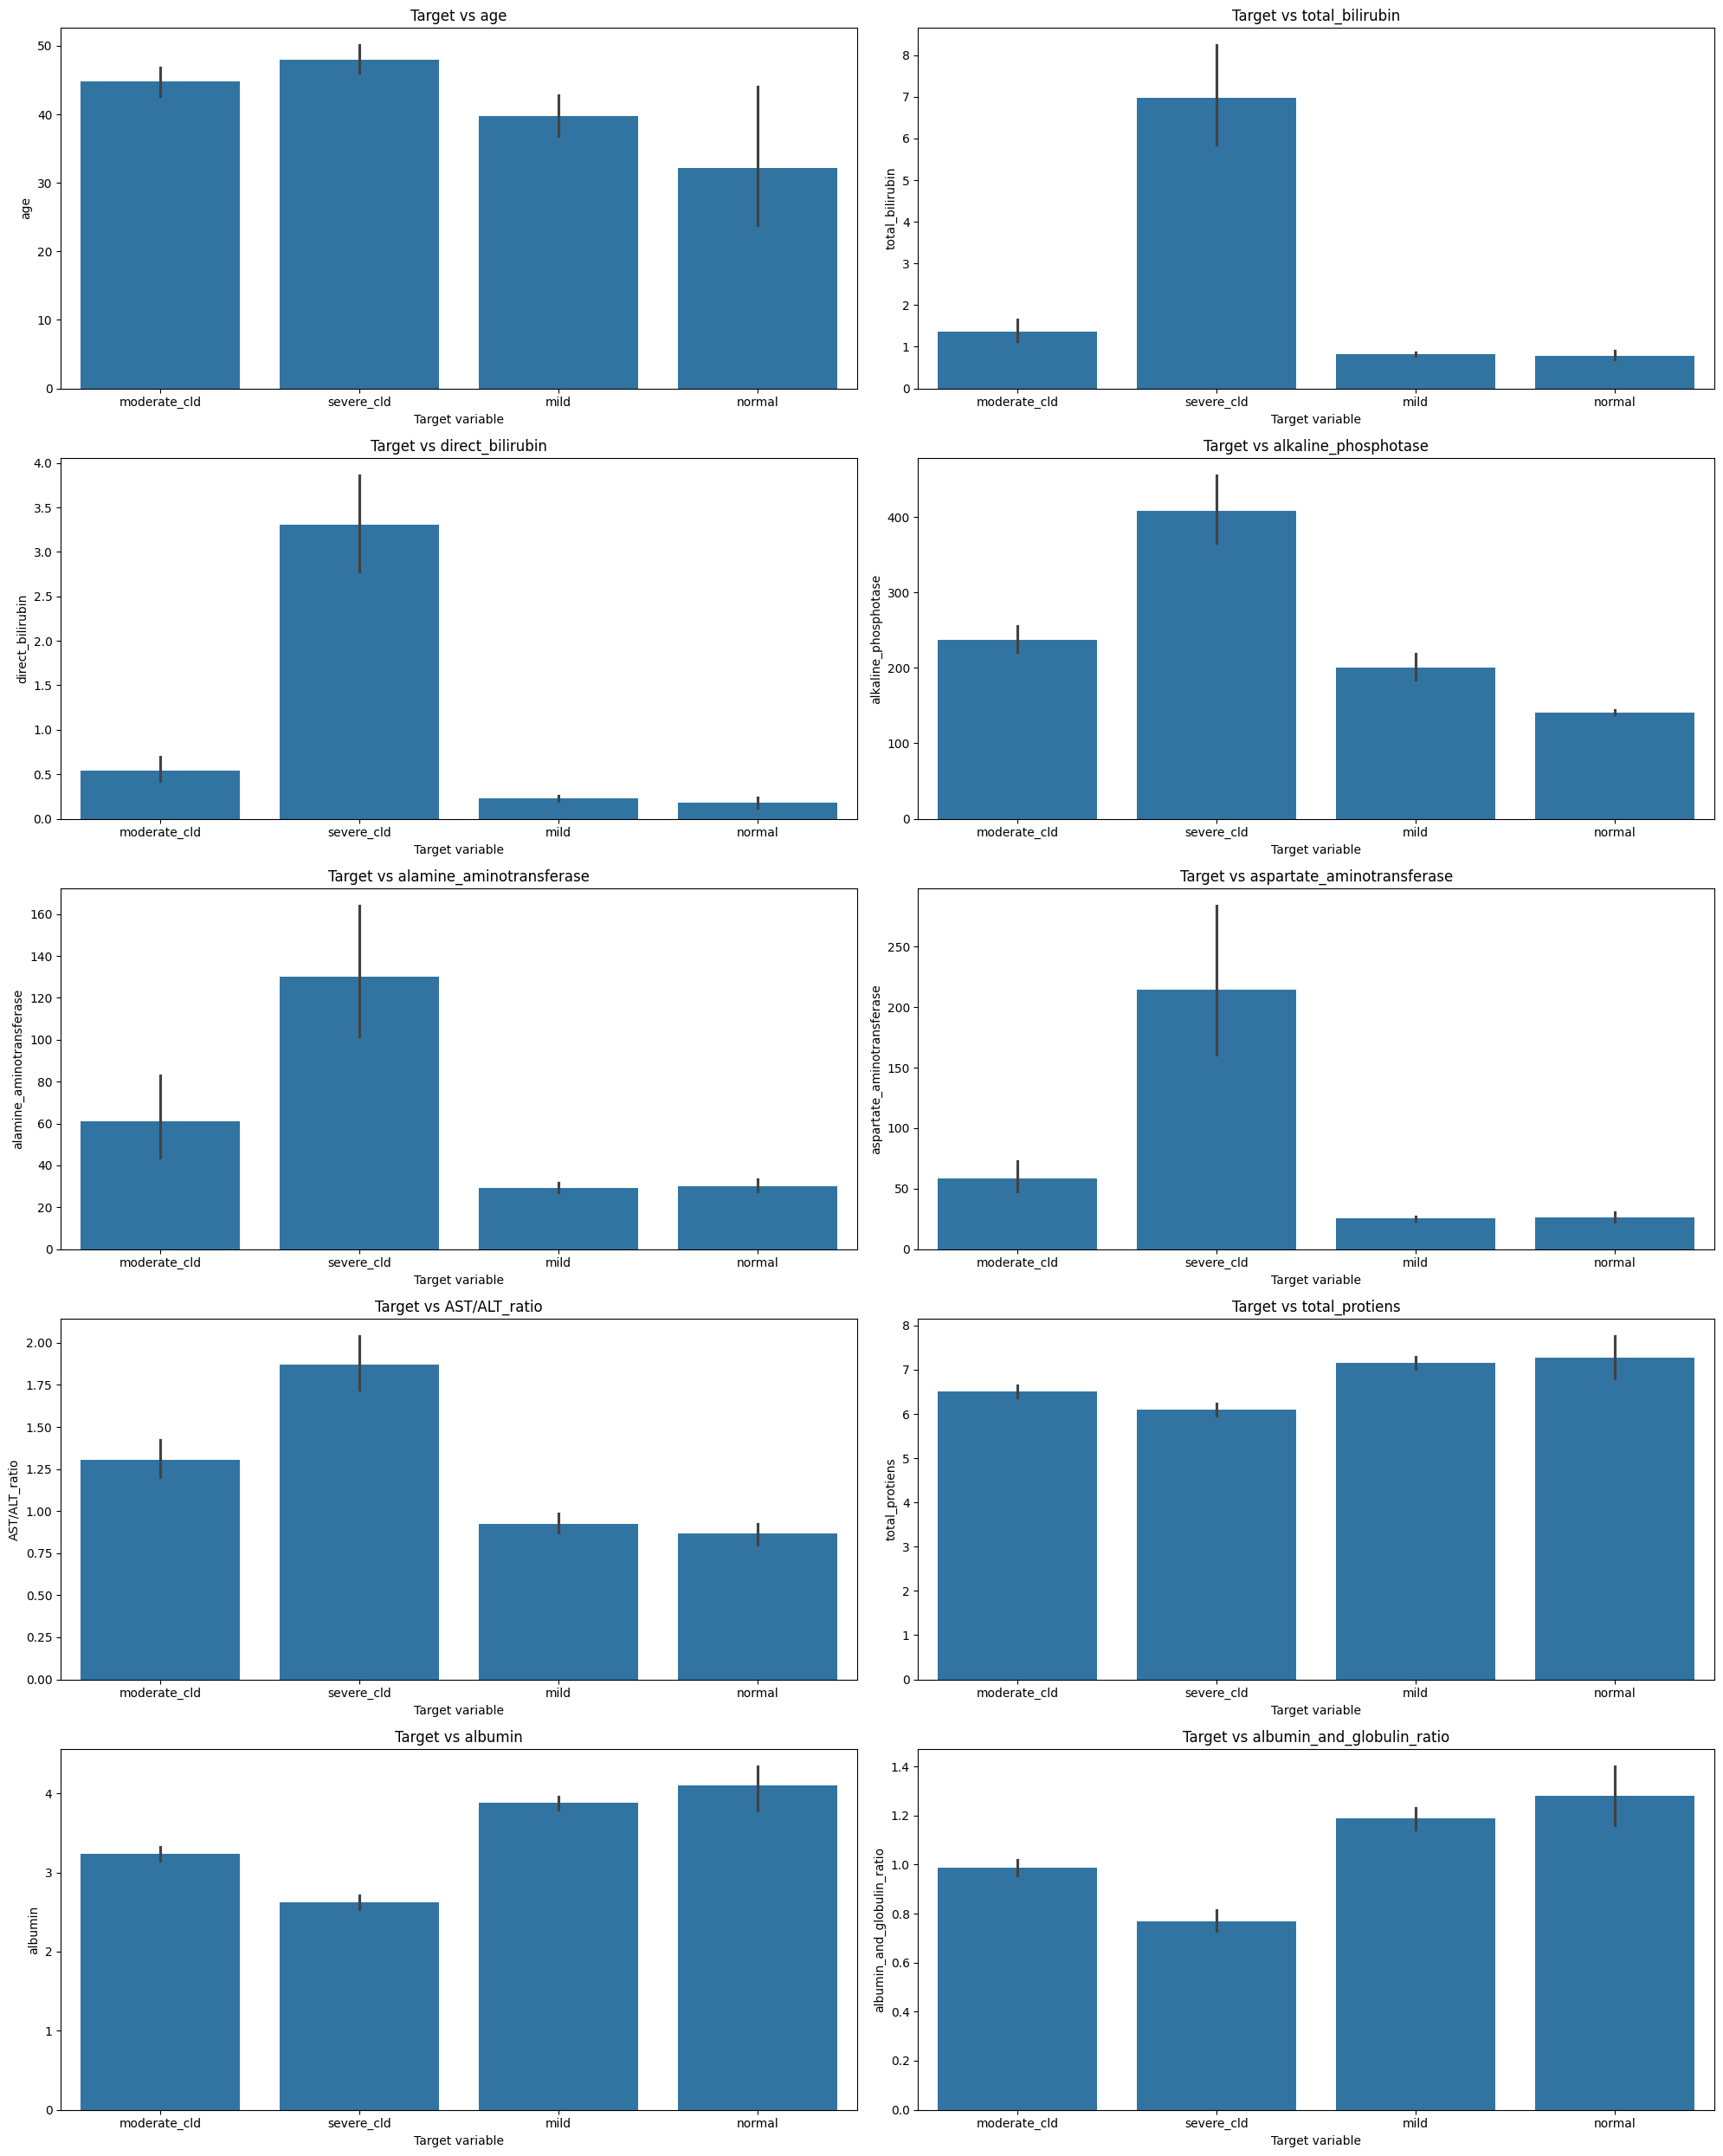

In [135]:
# Barplot to compare numerical column vs target column to see the diffrence 
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.barplot(df,x = 'class', y = col,ax = ax[i])
    ax[i].set_title(f"Target vs {col}")
    ax[i].set_xlabel("Target variable")
    
plt.tight_layout()
plt.show()

### Anova Test

In [136]:
df[df['class'] == 'normal']['age'].to_list()

[21, 26, 33, 25, 56]

In [137]:
from scipy.stats import f_oneway

RL = []
for i in num_col.columns:

    print(25*'-',i,25*'-')
    # Test scores from 4 different classes
    class_a = df[df['class'] == 'normal'][i].to_list()
    class_b = df[df['class'] == 'mild'][i].to_list()
    class_c = df[df['class'] == 'moderate_cld'][i].to_list()
    class_d = df[df['class'] == 'severe_cld'][i].to_list()


    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    # Interpret result
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: At least one group is significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    
    print(50*"*")
print(RL)

------------------------- age -------------------------
F-statistic: 7.5231
p-value: 0.0001
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- total_bilirubin -------------------------
F-statistic: 47.0234
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- direct_bilirubin -------------------------
F-statistic: 59.3276
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- alkaline_phosphotase -------------------------
F-statistic: 29.3043
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- alamine_aminotransferase -------------------------
F-stat

I performed a one-way ANOVA test to see if there were significant differences in lab parameters across liver disease severity classes (normal, mild, moderate_cld, severe_cld).

Parameters like age, total bilirubin, direct bilirubin, alkaline phosphotase, AST, AST/ALT ratio, total proteins, albumin, and albumin/globulin ratio showed significant differences between at least one of the groups (p < 0.05).

Some parameters, like alanine aminotransferase, did not show significant differences (p > 0.05).

In short, most liver function test markers differ across disease severity, which suggests they can be useful indicators for classification

In [138]:
pd.crosstab(df['gender'],df['class'])

class,mild,moderate_cld,normal,severe_cld
gender,,,,
female,46,53,3,36
male,67,184,2,175


In [139]:
from scipy.stats import chi2_contingency

# Observed table (actual survey)
data = pd.crosstab(df['gender'],df['class'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p, 4))
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis → gender and class are related.")
else:
    print("Fail to reject null hypothesis → No relationship.")

Chi-Square Statistic: 26.43
Degrees of Freedom: 3
p-value: 0.0
Expected Frequencies:
 [[ 27.55123675  57.7844523    1.21908127  51.44522968]
 [ 85.44876325 179.2155477    3.78091873 159.55477032]]
Reject the null hypothesis → gender and class are related.


I performed a Chi-square test to see if gender is associated with liver disease severity.

The Chi-square statistic is 26.43 with 3 degrees of freedom, and the p-value is 0.0.

Since p < 0.05, I reject the null hypothesis, meaning gender and disease severity are significantly related.

In [140]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens',
       'albumin', 'albumin_and_globulin_ratio', 'class'],
      dtype='object')

In [141]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
cat_col_En = pd.DataFrame(LE.fit_transform(cat_col),columns=cat_col.columns)

# using Lable encoder to assign categorical columns string to numeric 

In [142]:
y = y.replace({
        'normal' : 0,
        'mild' : 1,
        'moderate_cld' : 2,
        'severe_cld' :3
    })

# Insted of using ordinal encoder  i have just replace the values to number based on its natural order .

In [143]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
num_col_sc = pd.DataFrame(RS.fit_transform(num_col),columns=RS.get_feature_names_out())
num_col_sc

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,0.80,-0.166667,-0.181818,-0.172131,-0.503311,-0.370968,-0.048097,0.142857,0.166667,-0.125
1,0.68,5.500000,4.727273,4.024590,0.768212,0.951613,0.456921,0.642857,0.083333,-0.525
2,0.68,3.500000,3.454545,2.311475,0.662252,0.435484,-0.038478,0.285714,0.166667,-0.150
3,0.52,0.000000,0.090909,-0.213115,-0.556291,-0.338710,0.302324,0.142857,0.250000,0.125
4,1.08,1.611111,1.545455,-0.106557,-0.211921,0.290323,1.175704,0.500000,-0.583333,-1.375
...,...,...,...,...,...,...,...,...,...,...
561,0.60,-0.277778,-0.181818,2.393443,-0.397351,-0.112903,0.615641,-0.500000,-1.250000,-1.450
562,-0.20,-0.222222,-0.181818,-0.901639,0.000000,-0.161290,-0.324311,-0.428571,0.083333,0.375
563,0.28,-0.111111,-0.090909,0.303279,0.344371,0.129032,-0.168339,-0.142857,0.083333,0.125
564,-0.56,0.166667,0.181818,-0.196721,-0.158940,-0.145161,-0.072975,0.142857,0.250000,0.125


I used RobustScaler to scale the numerical features in my medical dataset. Since medical data often contains outliers (like abnormal test results), RobustScaler is better than StandardScaler because it uses the median and IQR instead of mean and standard deviation. This way, extreme values don’t dominate the scaling, and my features are well-prepared for machine learning models.

In [144]:
x = pd.concat([cat_col_En,num_col_sc],axis=1)
x
# Combine all scaled and Encoded feautures to x variable 

,gender,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,0,0.80,-0.166667,-0.181818,-0.172131,-0.503311,-0.370968,-0.048097,0.142857,0.166667,-0.125
1,1,0.68,5.500000,4.727273,4.024590,0.768212,0.951613,0.456921,0.642857,0.083333,-0.525
2,1,0.68,3.500000,3.454545,2.311475,0.662252,0.435484,-0.038478,0.285714,0.166667,-0.150
3,1,0.52,0.000000,0.090909,-0.213115,-0.556291,-0.338710,0.302324,0.142857,0.250000,0.125
4,1,1.08,1.611111,1.545455,-0.106557,-0.211921,0.290323,1.175704,0.500000,-0.583333,-1.375
...,...,...,...,...,...,...,...,...,...,...,...
561,1,0.60,-0.277778,-0.181818,2.393443,-0.397351,-0.112903,0.615641,-0.500000,-1.250000,-1.450
562,1,-0.20,-0.222222,-0.181818,-0.901639,0.000000,-0.161290,-0.324311,-0.428571,0.083333,0.375
563,1,0.28,-0.111111,-0.090909,0.303279,0.344371,0.129032,-0.168339,-0.142857,0.083333,0.125
564,1,-0.56,0.166667,0.181818,-0.196721,-0.158940,-0.145161,-0.072975,0.142857,0.250000,0.125


In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)
# Split train and test data

In [146]:
y_train.value_counts()

class
2    189
3    169
1     90
0      4
Name: count, dtype: int64

In [147]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_train, y_train = ROS.fit_resample(x_train, y_train)

y_train.value_counts()
# Due to minarity class very low

class
1    189
3    189
2    189
0    189
Name: count, dtype: int64

I applied RandomOverSampler to balance my medical dataset by duplicating minority class samples.
This ensures both classes have equal representation, improving model learning for rare disease cases.

In [148]:
x_train.duplicated().sum()

np.int64(304)

In [149]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [150]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       189
           1       0.84      0.78      0.81       189
           2       0.78      0.76      0.77       189
           3       0.91      0.85      0.88       189

    accuracy                           0.85       756
   macro avg       0.85      0.85      0.84       756
weighted avg       0.85      0.85      0.84       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         1
           1       0.65      0.74      0.69        23
           2       0.81      0.71      0.76        48
           3       0.87 

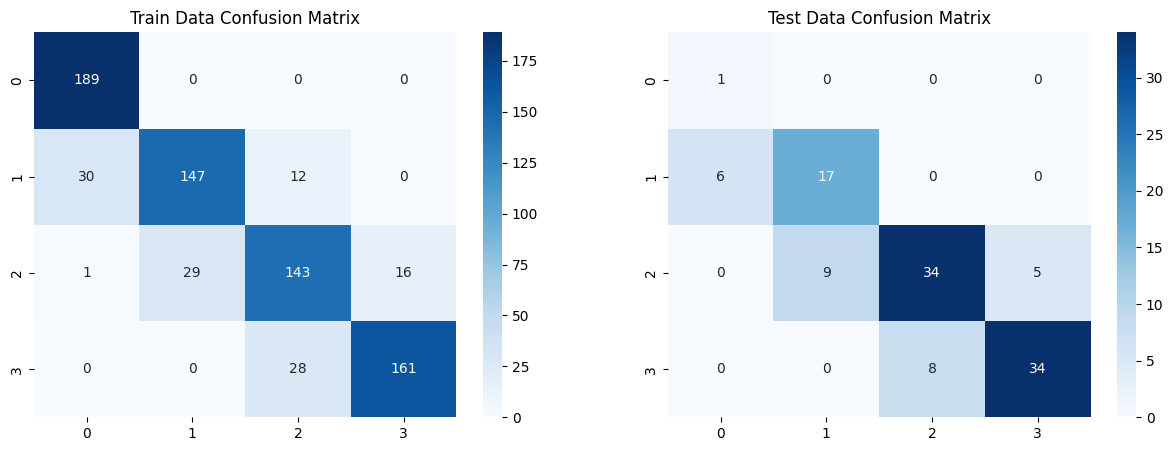

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       189
           1       0.72      0.58      0.65       189
           2       0.78      0.68      0.72       189
           3       0.91      0.87      0.89       189

    accuracy                           0.78       756
   macro avg       0.78      0.78      0.78       756
weighted avg       0.78      0.78      0.78       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         1
           1       0.54      0.57      0.55        23
           2     

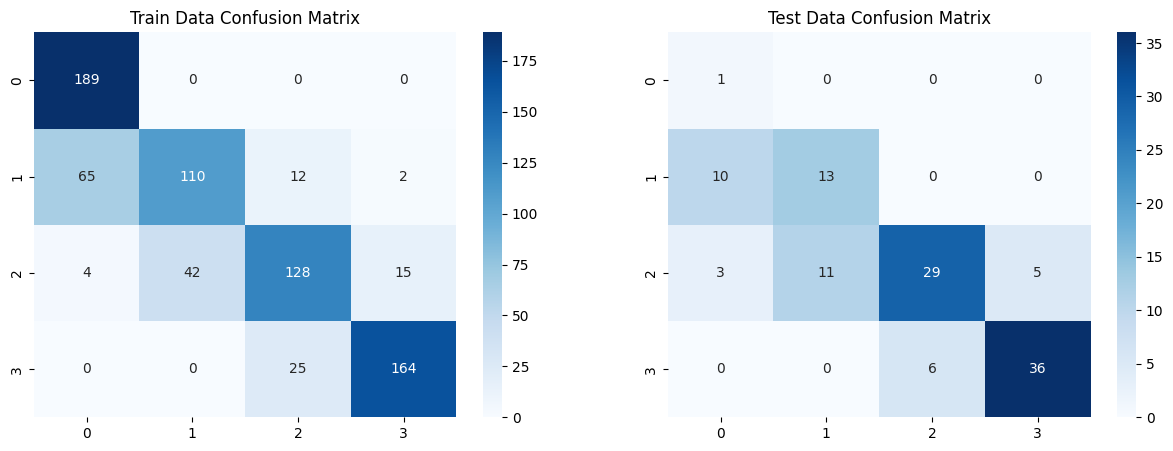

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       0.85      0.93      0.89       189
           2       0.86      0.75      0.80       189
           3       0.91      0.91      0.91       189

    accuracy                           0.90       756
   macro avg       0.90      0.90      0.90       756
weighted avg       0.90      0.90      0.90       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       0.53      0.70      0.60        23


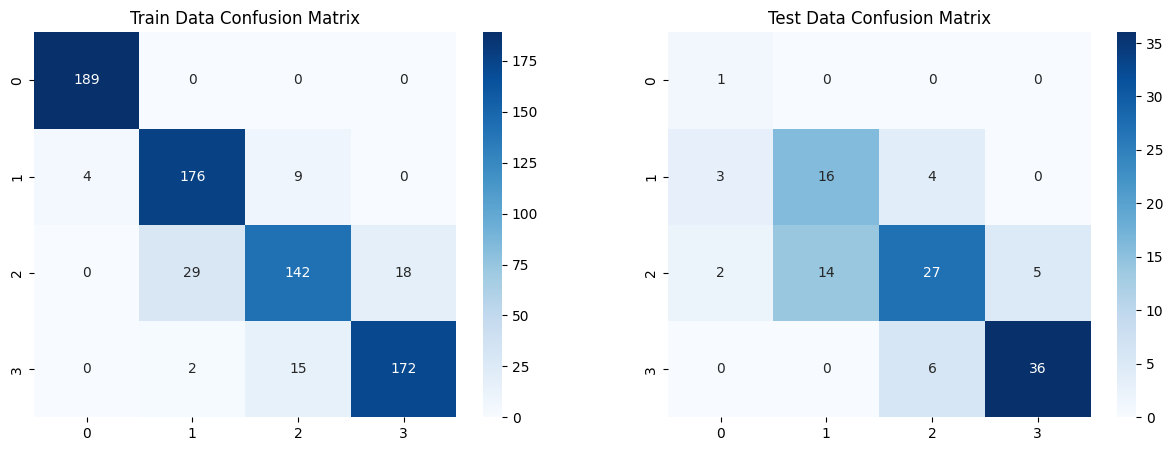

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.77      0.87      0.82        2

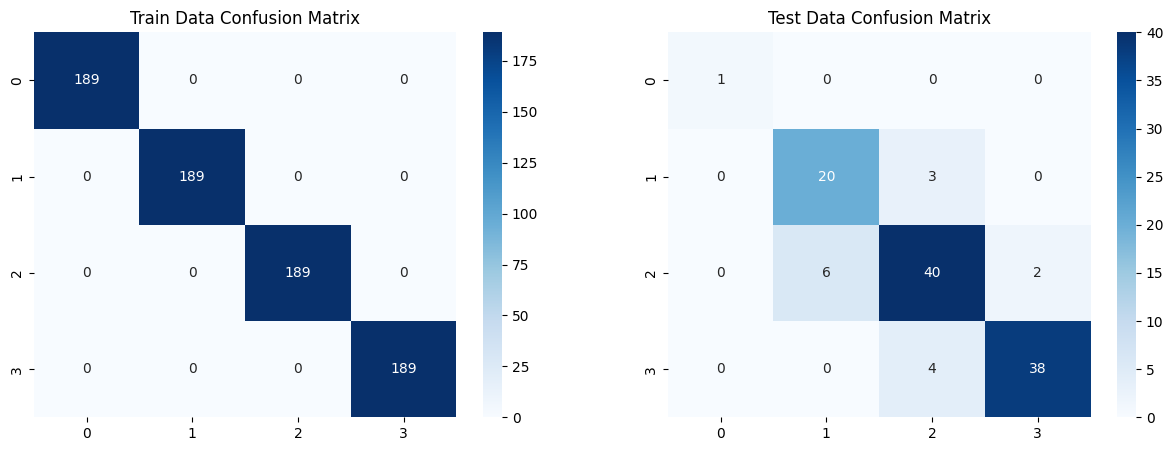

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      0.96      0.90        2

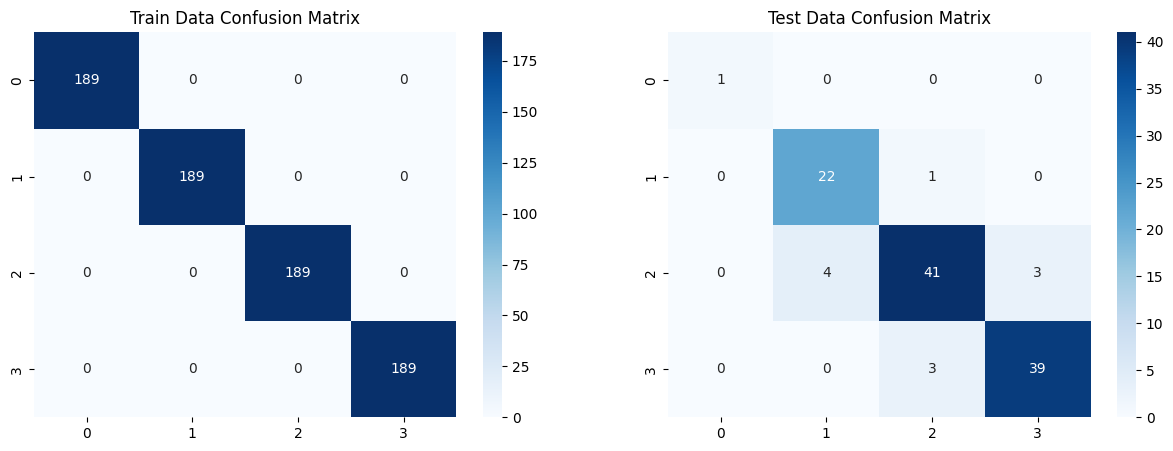

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       189
           1       0.64      0.90      0.75       189
           2       0.48      0.44      0.46       189
           3       0.89      0.56      0.68       189

    accuracy                           0.72       756
   macro avg       0.74      0.72      0.72       756
weighted avg       0.74      0.72      0.72       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.44      0.91      0.59        23
          

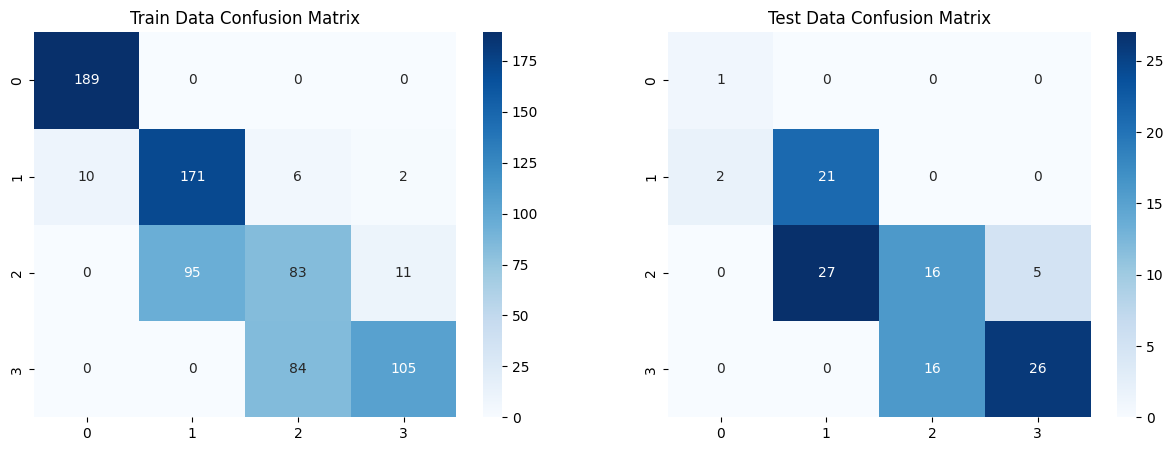

***************************************************************************


'I created a dictionary of classifiers (Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and Naïve Bayes). Then, in a loop:\n\nEach model is trained on my training data (x_train, y_train).\n\nI predict on both training and test sets.\n\nI print classification reports (precision, recall, f1-score, accuracy) for both sets.\n\nI plot confusion matrices side by side (train vs. test) for visual comparison.'

In [151]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')

'''I created a dictionary of classifiers (Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and Naïve Bayes). Then, in a loop:

Each model is trained on my training data (x_train, y_train).

I predict on both training and test sets.

I print classification reports (precision, recall, f1-score, accuracy) for both sets.

I plot confusion matrices side by side (train vs. test) for visual comparison.'''

My Random Forest model achieved 100% accuracy on training data and 94% accuracy on test data, showing strong performance but with slight overfitting.

In [152]:
y_train.value_counts()

class
1    189
3    189
2    189
0    189
Name: count, dtype: int64

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),      # reduce complexity
    'max_depth': randint(5, 30),           # restrict depth
    'min_samples_split': randint(5, 20),   # require more samples before split
    'min_samples_leaf': randint(3, 15),    # avoid tiny leaves
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],                   # usually better for generalization
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}


RFC = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=RFC,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations (increase for wider search)
    cv=5,        # Stratified by default; use StratifiedKFold if needed
    scoring='f1_macro',  # Optimizes for imbalanced classes
    random_state=42,
    n_jobs=-1,   # Parallelize
    verbose=1
)

random_search.fit(x_train,y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation F1-Macro Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 275}
Best Cross-Validation F1-Macro Score: 0.9495464534936394


I’m using RandomizedSearchCV to automatically find the best Random Forest settings. I set ranges for key parameters like number of trees, depth, and minimum samples per split/leaf, and then the search tests 100 random combinations using 5-fold cross-validation. The goal is to maximize the F1-macro score so the model handles all classes well, especially if they’re imbalanced. At the end, I get the best parameters and the corresponding performance score.

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.99      1.00      0.99       189
           2       1.00      0.98      0.99       189
           3       0.99      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.88      0.96      0.92        23
           2       0.95      0.88      0.91        48
           3       0.93      0.98      0.95        42

    accuracy                           0.93       114
   macro a

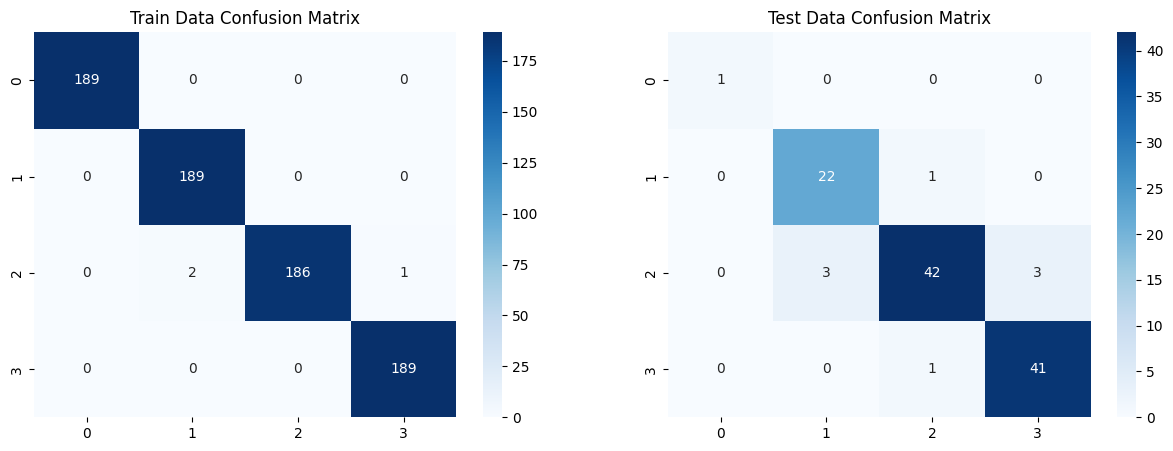

***************************************************************************


In [154]:
y_train_pread = random_search.predict(x_train)
y_test_pread = random_search.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

I evaluated the tuned Random Forest model on both training and test sets. On the training data, it achieved almost perfect performance (accuracy and F1 ≈ 1.0), showing it learned the patterns well. On the test set, the model still performed strongly with ~91% accuracy and F1-macro ≈ 0.93, though some classes show slightly lower precision/recall, indicating minor generalization gaps. Confusion matrices visually confirm that most predictions are correct, especially for larger classes."

If you want, I can also give an even shorter, “one-paragraph summary” version that you could paste in a report or presentation

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.97      1.00      0.99       189
           2       0.99      0.97      0.98       189
           3       0.99      0.99      0.99       189

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      0.96      0.90        23
           2       0.93      0.85      0.89        48
           3       0.93      0.95      0.94        42

    accuracy                           0.91       114
   macro a

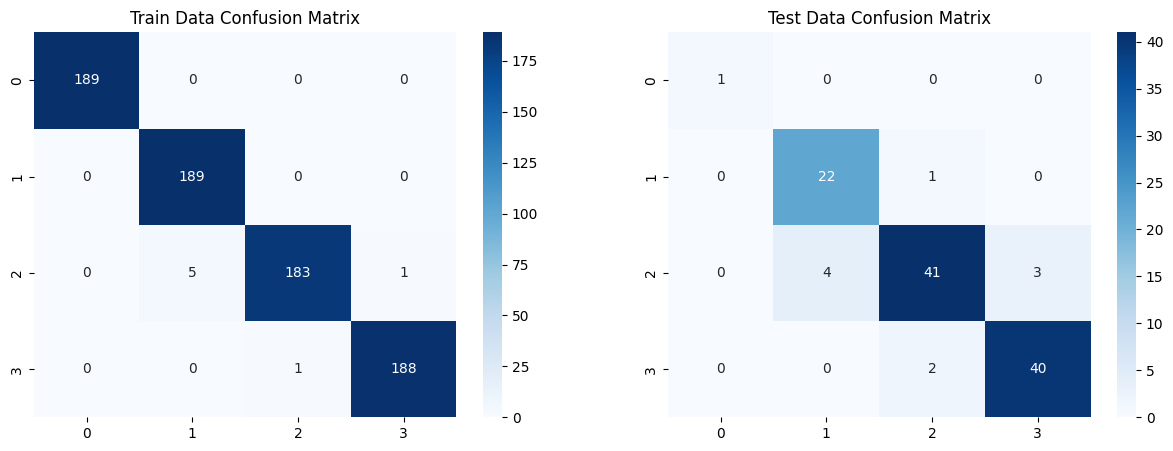

***************************************************************************


In [155]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
        bootstrap = True, 
        class_weight = 'balanced', 
        criterion ='entropy', 
        max_depth = 5, 
        max_features = 'sqrt', 
        min_samples_leaf = 3, 
        min_samples_split = 5, 
        n_estimators= 100 
)
RFC.fit(x_train, y_train)

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

I manually tuned the Random Forest parameters—limiting max_depth, increasing min_samples_split and min_samples_leaf, and using class_weight='balanced'—to reduce overfitting. As a result, the model still performs extremely well on the training set (≈99% accuracy) but generalizes better to the test set (≈93% accuracy, F1-macro ≈ 0.95), showing a more realistic and robust performance. Confusion matrices confirm that predictions are mostly correct across all classes.

In [156]:
# using my full dataset to compare my model
x1,y1 = ROS.fit_resample(x,y)
print(x1.duplicated().sum(),y1.value_counts())

382 class
2    237
3    237
1    237
0    237
Name: count, dtype: int64


382 class
2    237
3    237
1    237
0    237
Name: count, dtype: int64
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.97      1.00      0.99       189
           2       0.99      0.97      0.98       189
           3       0.99      0.99      0.99       189

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.96      0.99      0.98       237
           2       0.98      0.95      0.96       237
           3       0.98      0.99      0.99    

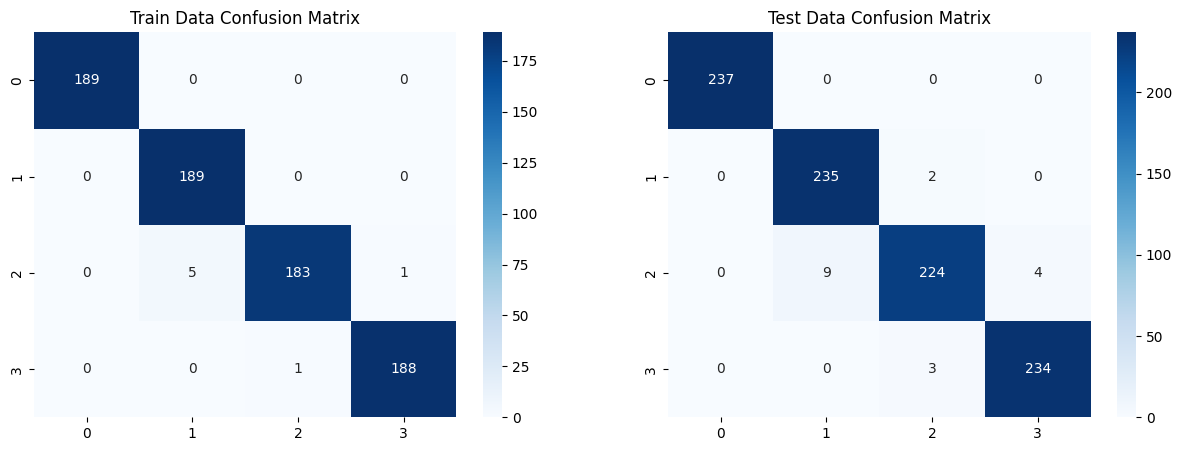

***************************************************************************


In [157]:
x1,y1 = ROS.fit_resample(x,y)
print(x1.duplicated().sum(),y1.value_counts())

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x1)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y1, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y1, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

Testing my model with real data using random over sapmpler to view how my miodel performing well.Likely its best output

Test Accuracy: 0.9210526315789473
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.92      0.96      0.94        23
           2       0.90      0.92      0.91        48
           3       0.95      0.90      0.93        42

    accuracy                  

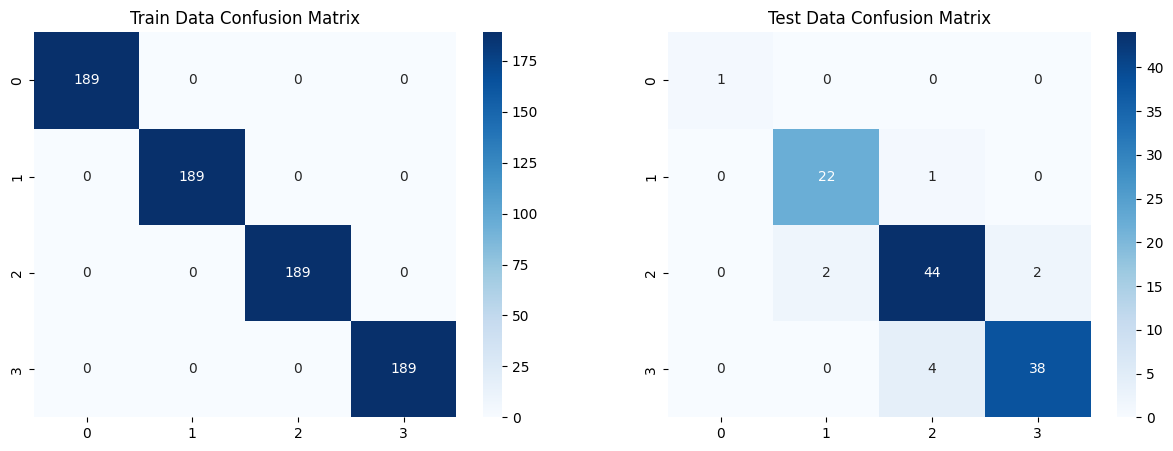

***************************************************************************


In [158]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,    
    learning_rate=0.05,    
    max_depth=3,           
    subsample=0.8,            
    colsample_bytree=0.8,      
    reg_alpha=0.1,            
    reg_lambda=1.0,          
    scale_pos_weight=1,       
    eval_metric="logloss",
    random_state=42
)

xgb.fit(x_train, y_train)
print("Test Accuracy:", xgb.score(x_test, y_test))


y_train_pread = xgb.predict(x_train)
y_test_pread = xgb.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

## Pipeline Build

In [159]:
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio,class
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90,moderate_cld
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74,severe_cld
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89,severe_cld
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00,moderate_cld
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40,severe_cld
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37,moderate_cld
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10,mild
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00,moderate_cld
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00,moderate_cld


In [160]:
# Importing libraries for pipline bilding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [161]:
cat_col_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('Order',OrdinalEncoder(categories=[['female','male']],dtype='int64'))
    ]
)
cat_col_trans

# Catrgorical column transformation

,steps,"[('imputer', ...), ('Order', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['female', 'male']]"


In [162]:
num_col_trans = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors = 5)),
        ('scalar',RobustScaler())
    ]
)
num_col_trans

# Numerical column transformation

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [163]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', cat_col_trans, cat_col.columns),
        ('num', num_col_trans, num_col.columns)
    ]
)
preprocess

# Combine both categorical and Numerical column Tranformet in to one using column transformer

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [164]:
from imblearn.pipeline import Pipeline

In [165]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocess),
        ('Over_Sample',RandomOverSampler()),
        ('Random Forest Classification',RandomForestClassifier(
                                                bootstrap = True, 
                                                class_weight = {
                                                                0: 1.0,
                                                                1: 1.0,
                                                                2: 3.0,
                                                                3: 3.0 
                                                            }, 
                                                criterion ='entropy', 
                                                max_depth = 5, 
                                                max_features = 'sqrt', 
                                                min_samples_leaf = 3, 
                                                min_samples_split = 5, 
                                                n_estimators= 100 
                                        ))
        
    ]
)
model

# From my prviouse model build gather all hyper per parameter tuning bild pipeline 

,steps,"[('preprocessor', ...), ('Over_Sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [166]:
x = df.drop(['class'],axis=1)
y = df['class'].apply(lambda x:0 if x == 'normal' else (
                    1 if x == 'mild' else(
                        2 if x == 'moderate_cld' else 3
                    )
                    ))


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)



In [167]:
model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('Over_Sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.97      0.85      0.91        85
           2       0.93      0.98      0.95       177
           3       0.99      1.00      0.99       158

    accuracy                           0.96       424
   macro avg       0.97      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.96      0.86      0.91        28
           2       0.89      0.93      0.91        60
           3       0.94      0.94      0.94        53

    accuracy                           0.92       142
   macro a

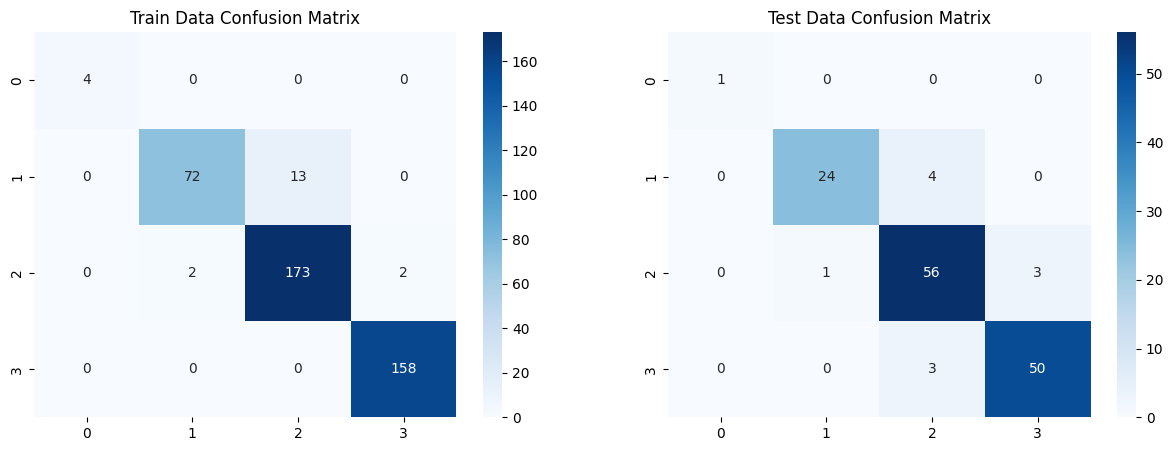

***************************************************************************


In [168]:
y_train_pread = model.predict(x_train)
y_test_pread = model.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

In [169]:
y.value_counts()

class
2    237
3    211
1    113
0      5
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.97      0.85      0.91       113
           2       0.92      0.97      0.94       237
           3       0.98      0.99      0.98       211

    accuracy                           0.95       566
   macro avg       0.97      0.95      0.96       566
weighted avg       0.95      0.95      0.95       566



<Axes: >

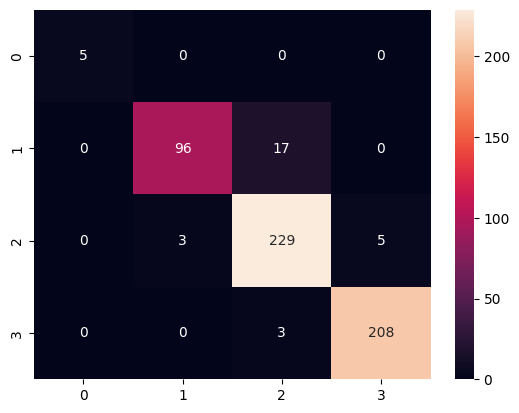

In [172]:
print(classification_report(y,model.predict(x)))
sns.heatmap(confusion_matrix(y,model.predict(x)),annot=True,fmt='d')

In [173]:
import pickle
pickle.dump(model,open('cld_model.pkl','wb'))

# Save the model in to my local system for future use case 